#### Exercise 04

Metropolis simulation of the 4d scalar phi^4 theory.

A c++ code to simulate the model is available in the folder 'code', and the data from which these plots are made are in 'code/results'

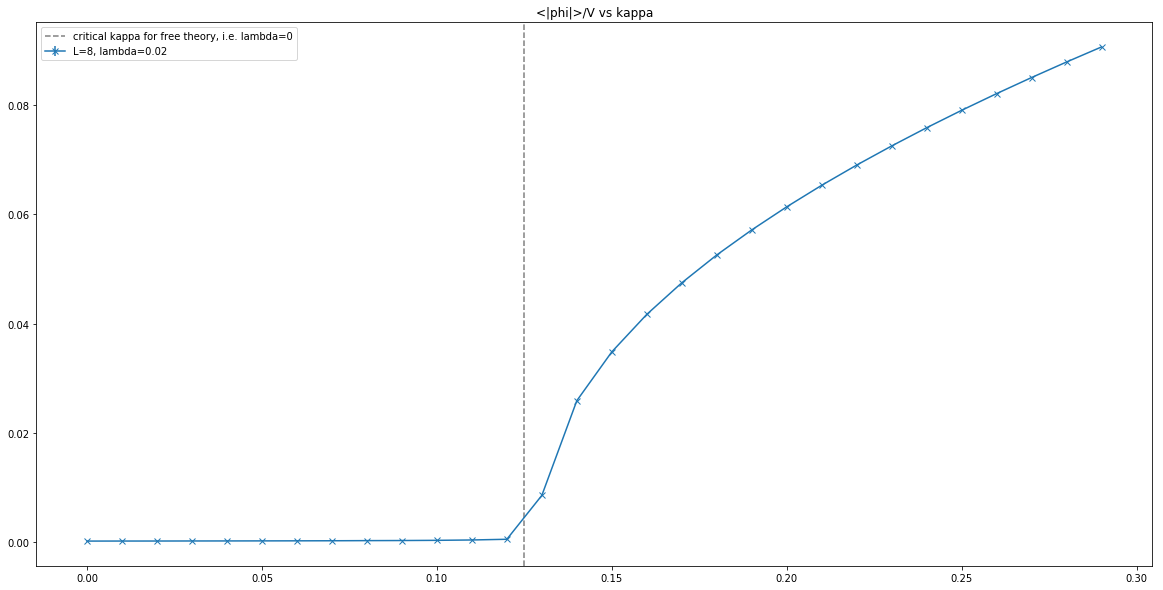

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
dat = np.loadtxt("code/results/L8_lambda0.02.txt")
plt.errorbar(dat[:,0],dat[:,5], yerr=dat[:,6], marker='x', label="L=8, lambda=0.02")
plt.axvline(x=1.0/8.0, label="critical kappa for free theory, i.e. lambda=0", linestyle='--', color="grey")
plt.title("<|phi|>/V vs kappa")
plt.legend()
plt.show()